# Importing libraries and classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tabulate import tabulate
from sklearn.metrics import (
    median_absolute_error,
    max_error,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
)
from sklearn.model_selection import train_test_split
from Utils import Utils
from DecisionTreeRegressor import DecisionTreeRegressor
from RandomForestRegressor import RandomForestRegressor
from LinearRegression import LinearRegression

# Reading and splitting the data

In [2]:
# Load the dataset
df = pd.read_csv('./NSO_Population_Sex_dataset/NSO_POPULATION_DATA_CLEANED.csv')

# Define feature columns and target variable
feature_cols = ['District', 'Sex', 'Year', 'Population_Growth_Rate', 'Average_Population']
X = pd.get_dummies(df[feature_cols], columns=['District', 'Sex'])
y = df["Population"]

# Custom Implementations - Decision Tree, Random Forest, Linear Regression

In [ ]:
NUMBER_OF_RUNS = 100

In [3]:
# Hyperparameters for Decision Tree, Random Forest, and Linear Regression
DT_Parameters = {
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20],
    'max_depth': [10, 25, 50, 75, 100, 125, 150, 175, 200]
}

RF_Parameters = {
    'n_estimators': [75, 100, 125],
    'min_samples_split': [2, 5, 10],
    'max_depth': [25, 50, 75, 100]
}

LR_Parameters = {
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'num_iterations': [50, 100, 250, 500, 750, 1000, 1250, 1500]
}

# Lists to store results for each algorithm
DT_All_Best_Predictions, RF_All_Best_Predictions, LR_All_Best_Predictions = [], [], []
DT_Total_Time, DT_Total_MSE, DT_Total_MAE, DT_Total_RMSE, DT_Total_R2, DT_Total_Explained_Variance, DT_Total_MedianAE, DT_Total_MaxError = [0.0] * 8
RF_Total_Time, RF_Total_MSE, RF_Total_MAE, RF_Total_RMSE, RF_Total_R2, RF_Total_Explained_Variance, RF_Total_MedianAE, RF_Total_MaxError = [0.0] * 8
LR_Total_Time, LR_Total_MSE, LR_Total_MAE, LR_Total_RMSE, LR_Total_R2, LR_Total_Explained_Variance, LR_Total_MedianAE, LR_Total_MaxError = [0.0] * 8

# Lists to store actual values for each algorithm
All_Actual_Values = []

for run in range(NUMBER_OF_RUNS):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=run)

    All_Actual_Values.append(y_test.values)

    DT_Best_Model, DT_Best_Prediction, DT_Best_Parameters, DT_Best_Time, DT_Best_MSE = None, None, None, None, float('inf')
    RF_Best_Model, RF_Best_Prediction, RF_Best_Parameters, RF_Best_Time, RF_Best_MSE = None, None, None, None, float('inf')
    LR_Best_Model, LR_Best_Prediction, LR_Best_Parameters, LR_Best_Time, LR_Best_MSE = None, None, None, None, float('inf')

    # Decision Tree
    for min_samples_split in DT_Parameters['min_samples_split']:
        for max_depth in DT_Parameters['max_depth']:
            DT_Start_Time = time.time()
            DT_Temp_Model = DecisionTreeRegressor(min_samples_split=min_samples_split, max_depth=max_depth)
            DT_Temp_Model.fit(X_train.values, y_train.values)
            DT_Temp_Prediction = DT_Temp_Model.predict(X_test.values)
            DT_End_Time = time.time()
            DT_Temp_Time = DT_End_Time - DT_Start_Time
            DT_Temp_MSE = mean_squared_error(y_test, DT_Temp_Prediction)

            # Determining best hyperparameters based on MSE
            if DT_Temp_MSE < DT_Best_MSE:
                DT_Best_Model, DT_Best_Parameters, DT_Best_Prediction, DT_Best_Time, DT_Best_MSE = DT_Temp_Model, {'min_samples_split': min_samples_split, 'max_depth': max_depth}, DT_Temp_Prediction, DT_Temp_Time, DT_Temp_MSE

    # Random Forest
    for n_estimators in RF_Parameters['n_estimators']:
        for min_sample_split in RF_Parameters['min_samples_split']:
            for max_depth in RF_Parameters['max_depth']:
                RF_Start_Time = time.time()
                RF_Temp_Model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_sample_split)
                RF_Temp_Model.fit(X_train, y_train)
                RF_Temp_Prediction = RF_Temp_Model.predict(X_test)
                RF_End_Time = time.time()
                RF_Temp_Time = RF_End_Time - RF_Start_Time
                RF_Temp_MSE = mean_squared_error(y_test, RF_Temp_Prediction)

                # Determining best hyperparameters based on MSE
                if RF_Temp_MSE < RF_Best_MSE:
                    RF_Best_Model, RF_Best_Parameters, RF_Best_Prediction, RF_Best_Time, RF_Best_MSE = RF_Temp_Model, {'n_estimators': n_estimators, 'min_samples_split': min_sample_split, 'max_depth': max_depth}, RF_Temp_Prediction, RF_Temp_Time, RF_Temp_MSE

    # Linear Regression
    for learning_rate in LR_Parameters['learning_rate']:
        for num_iterations in LR_Parameters['num_iterations']:
            LR_Start_Time = time.time()
            LR_Temp_Model = LinearRegression(learning_rate=learning_rate, num_iterations=num_iterations)
            LR_Temp_Model.fit(X_train.values, y_train.values)
            LR_Temp_Prediction = LR_Temp_Model.predict(X_test.values)
            LR_End_Time = time.time()
            LR_Temp_Time = LR_End_Time - LR_Start_Time
            LR_Temp_MSE = mean_squared_error(y_test, LR_Temp_Prediction)

            # Determining best hyperparameters based on MSE
            if LR_Temp_MSE < LR_Best_MSE:
                LR_Best_Model, LR_Best_Parameters, LR_Best_Prediction, LR_Best_Time, LR_Best_MSE = LR_Temp_Model, {'learning_rate': learning_rate, 'num_iterations': num_iterations}, LR_Temp_Prediction, LR_Temp_Time, LR_Temp_MSE

    # Store values to find averages after all runs are finished
    DT_All_Best_Predictions.append(DT_Best_Prediction)
    DT_Total_Time += DT_Best_Time
    DT_Total_MSE += DT_Best_MSE
    DT_Total_MAE += mean_absolute_error(y_test, DT_Best_Prediction)
    DT_Total_RMSE += Utils.root_mean_squared_error(y_test, DT_Best_Prediction)
    DT_Total_R2 += r2_score(y_test, DT_Best_Prediction)
    DT_Total_Explained_Variance += explained_variance_score(y_test, DT_Best_Prediction)
    DT_Total_MedianAE += median_absolute_error(y_test, DT_Best_Prediction)
    DT_Total_MaxError += max_error(y_test, DT_Best_Prediction)

    RF_All_Best_Predictions.append(RF_Best_Prediction)
    RF_Total_Time += RF_Best_Time
    RF_Total_MSE += RF_Best_MSE
    RF_Total_MAE += mean_absolute_error(y_test, RF_Best_Prediction)
    RF_Total_RMSE += Utils.root_mean_squared_error(y_test, RF_Best_Prediction)
    RF_Total_R2 += r2_score(y_test, RF_Best_Prediction)
    RF_Total_Explained_Variance += explained_variance_score(y_test, RF_Best_Prediction)
    RF_Total_MedianAE += median_absolute_error(y_test, RF_Best_Prediction)
    RF_Total_MaxError += max_error(y_test, RF_Best_Prediction)

    LR_All_Best_Predictions.append(LR_Best_Prediction)
    LR_Total_Time += LR_Best_Time
    LR_Total_MSE += LR_Best_MSE
    LR_Total_MAE += mean_absolute_error(y_test, LR_Best_Prediction)
    LR_Total_RMSE += Utils.root_mean_squared_error(y_test, LR_Best_Prediction)
    LR_Total_R2 += r2_score(y_test, LR_Best_Prediction)
    LR_Total_Explained_Variance += explained_variance_score(y_test, LR_Best_Prediction)
    LR_Total_MedianAE += median_absolute_error(y_test, LR_Best_Prediction)
    LR_Total_MaxError += max_error(y_test, LR_Best_Prediction)

    print(f"Run {run + 1}")

# Finding average values across all runs
Average_Actual_Values = np.mean(All_Actual_Values, axis=0)

DT_Average_Predictions = np.mean(DT_All_Best_Predictions, axis=0)
DT_Average_Time = DT_Total_Time / NUMBER_OF_RUNS
DT_Average_MSE = DT_Total_MSE / NUMBER_OF_RUNS
DT_Average_MAE = DT_Total_MAE / NUMBER_OF_RUNS
DT_Average_RMSE = DT_Total_RMSE / NUMBER_OF_RUNS
DT_Average_R2 = DT_Total_R2 / NUMBER_OF_RUNS
DT_Average_Explained_Variance = DT_Total_Explained_Variance / NUMBER_OF_RUNS
DT_Average_MedianAE = DT_Total_MedianAE / NUMBER_OF_RUNS
DT_Average_MaxError = DT_Total_MaxError / NUMBER_OF_RUNS

RF_Average_Predictions = np.mean(RF_All_Best_Predictions, axis=0)
RF_Average_Time = RF_Total_Time / NUMBER_OF_RUNS
RF_Average_MSE = RF_Total_MSE / NUMBER_OF_RUNS
RF_Average_MAE = RF_Total_MAE / NUMBER_OF_RUNS
RF_Average_RMSE = RF_Total_RMSE / NUMBER_OF_RUNS
RF_Average_R2 = RF_Total_R2 / NUMBER_OF_RUNS
RF_Average_Explained_Variance = RF_Total_Explained_Variance / NUMBER_OF_RUNS
RF_Average_MedianAE = RF_Total_MedianAE / NUMBER_OF_RUNS
RF_Average_MaxError = RF_Total_MaxError / NUMBER_OF_RUNS

LR_Average_Predictions = np.mean(LR_All_Best_Predictions, axis=0)
LR_Average_Time = LR_Total_Time / NUMBER_OF_RUNS
LR_Average_MSE = LR_Total_MSE / NUMBER_OF_RUNS
LR_Average_MAE = LR_Total_MAE / NUMBER_OF_RUNS
LR_Average_RMSE = LR_Total_RMSE / NUMBER_OF_RUNS
LR_Average_R2 = LR_Total_R2 / NUMBER_OF_RUNS
LR_Average_Explained_Variance = LR_Total_Explained_Variance / NUMBER_OF_RUNS
LR_Average_MedianAE = LR_Total_MedianAE / NUMBER_OF_RUNS
LR_Average_MaxError = LR_Total_MaxError / NUMBER_OF_RUNS

print(f"\nDecision Tree Metrics over {NUMBER_OF_RUNS} runs:")
print(f"Average Execution Time in seconds: {DT_Average_Time:.6f}")
print(f"Average Mean Squared Error: {DT_Average_MSE:.6f}")
print(f"Average Root Mean Squared Error: {DT_Average_RMSE:.6f}")
print(f"Average Mean Absolute Error: {DT_Average_MAE:.6f}")
print(f"Average R Squared: {DT_Average_R2:.6f}")
print(f"Average Explained Variance: {DT_Average_Explained_Variance:.6f}")
print(f"Average Median Absolute Error: {DT_Average_MedianAE:.6f}")
print(f"Average Max Error: {DT_Average_MaxError:.6f}")

print(f"\nRandom Forest Metrics over {NUMBER_OF_RUNS} runs:")
print(f"Average Execution Time in seconds: {RF_Average_Time:.6f}")
print(f"Average Mean Squared Error: {RF_Average_MSE:.6f}")
print(f"Average Root Mean Squared Error: {RF_Average_RMSE:.6f}")
print(f"Average Mean Absolute Error: {RF_Average_MAE:.6f}")
print(f"Average R Squared: {RF_Average_R2:.6f}")
print(f"Average Explained Variance: {RF_Average_Explained_Variance:.6f}")
print(f"Average Median Absolute Error: {RF_Average_MedianAE:.6f}")
print(f"Average Max Error: {RF_Average_MaxError:.6f}")

print(f"\nLinear Regression Metrics over {NUMBER_OF_RUNS} runs:")
print(f"Average Execution Time in seconds: {LR_Average_Time:.6f}")
print(f"Average Mean Squared Error: {LR_Average_MSE:.6f}")
print(f"Average Root Mean Squared Error: {LR_Average_RMSE:.6f}")
print(f"Average Mean Absolute Error: {LR_Average_MAE:.6f}")
print(f"Average R Squared: {LR_Average_R2:.6f}")
print(f"Average Explained Variance: {LR_Average_Explained_Variance:.6f}")
print(f"Average Median Absolute Error: {LR_Average_MedianAE:.6f}")
print(f"Average Max Error: {LR_Average_MaxError:.6f}")

Run 1


KeyboardInterrupt: 

In [ ]:
# Ensuring actual and predicted value lists are numeric arrays
Average_Actual_Values_Numeric = np.asarray(Average_Actual_Values, dtype=np.float64)
DT_Average_Prediction_Numeric = np.asarray(DT_Average_Predictions, dtype=np.float64)
RF_Average_Prediction_Numeric = np.asarray(RF_Average_Predictions, dtype=np.float64)
LR_Average_Prediction_Numeric = np.asarray(LR_Average_Predictions, dtype=np.float64)

# Scatter Plot - Actual vs Predicted values

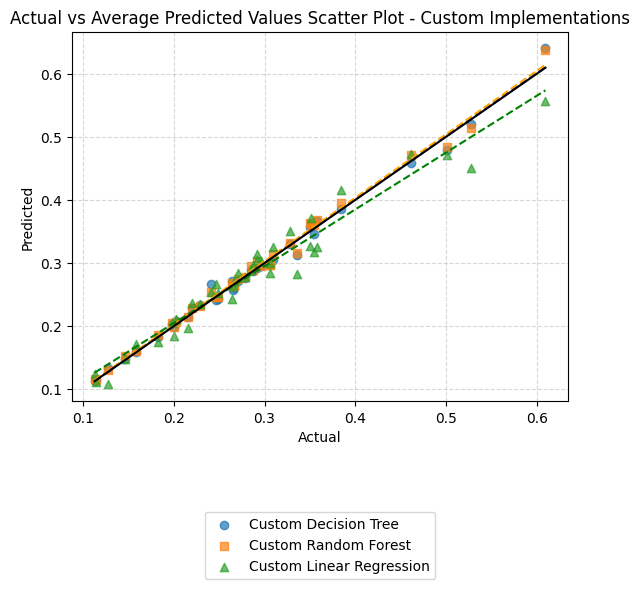

In [ ]:
# Custom Decision Tree vs Custom Random Forest vs Custom Linear Regression
plt.scatter(Average_Actual_Values_Numeric, DT_Average_Prediction_Numeric, alpha=0.7, marker='o', label='Custom Decision Tree')
plt.scatter(Average_Actual_Values_Numeric, RF_Average_Prediction_Numeric, alpha=0.7, marker='s', label='Custom Random Forest')
plt.scatter(Average_Actual_Values_Numeric, LR_Average_Prediction_Numeric, alpha=0.7, marker='^', label='Custom Linear Regression')

# Regression lines
plt.plot(np.unique(Average_Actual_Values_Numeric), np.poly1d(np.polyfit(Average_Actual_Values_Numeric, DT_Average_Prediction_Numeric, 1))(np.unique(Average_Actual_Values_Numeric)), color='blue', linestyle='--')
plt.plot(np.unique(Average_Actual_Values_Numeric), np.poly1d(np.polyfit(Average_Actual_Values_Numeric, RF_Average_Prediction_Numeric, 1))(np.unique(Average_Actual_Values_Numeric)), color='orange', linestyle='--')
plt.plot(np.unique(Average_Actual_Values_Numeric), np.poly1d(np.polyfit(Average_Actual_Values_Numeric, LR_Average_Prediction_Numeric, 1))(np.unique(Average_Actual_Values_Numeric)), color='green', linestyle='--')

# Reference line
plt.plot([min(Average_Actual_Values_Numeric), max(Average_Actual_Values_Numeric)], [min(Average_Actual_Values_Numeric), max(Average_Actual_Values_Numeric)], linestyle='-', color='black')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Average Predicted Values Scatter Plot - Custom Implementations')

plt.legend(['Custom Decision Tree', 'Custom Random Forest', 'Custom Linear Regression'], loc='lower center', bbox_to_anchor=(0.5,-0.5))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Line Plot - Actual vs Predicted values

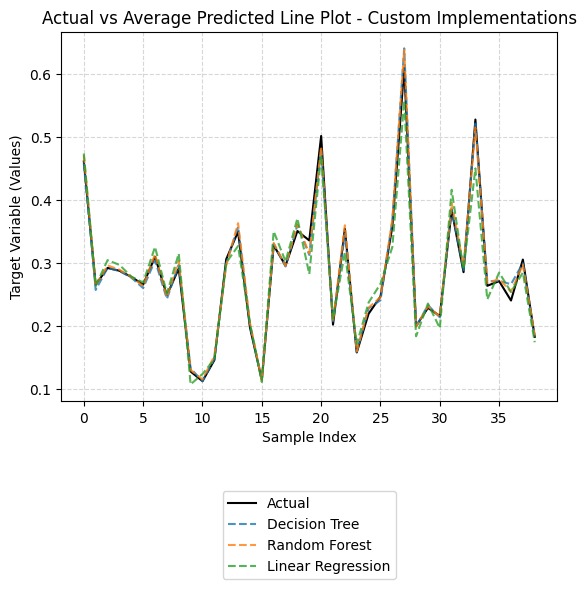

In [ ]:
# Custom Decision Tree vs Custom Random Forest vs Custom Linear Regression
plt.plot(Average_Actual_Values_Numeric, label='Actual', color='black', linestyle='-')
plt.plot(DT_Average_Prediction_Numeric, label='Decision Tree', alpha=0.8, linestyle='--')
plt.plot(RF_Average_Prediction_Numeric, label='Random Forest', alpha=0.8, linestyle='--')
plt.plot(LR_Average_Prediction_Numeric, label='Linear Regression', alpha=0.8, linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable (Values)')
plt.title('Actual vs Average Predicted Line Plot - Custom Implementations')
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.5))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Residual Plots

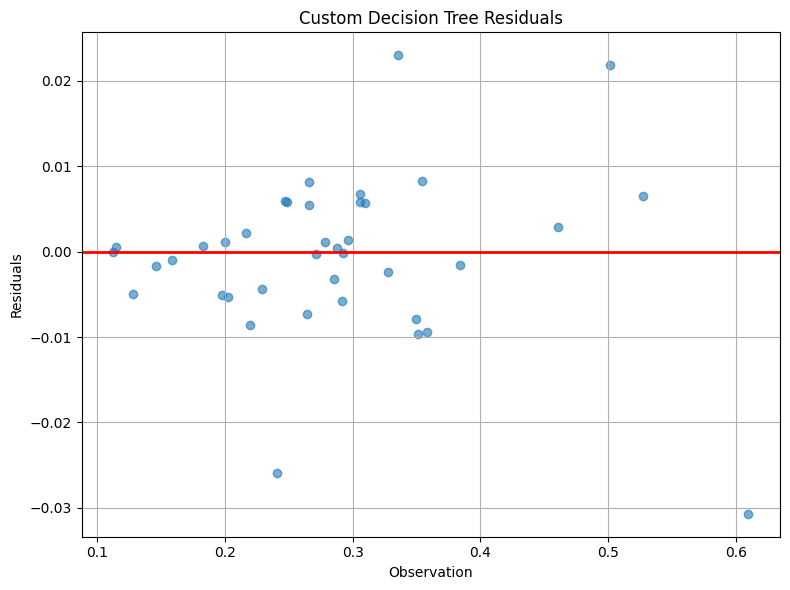

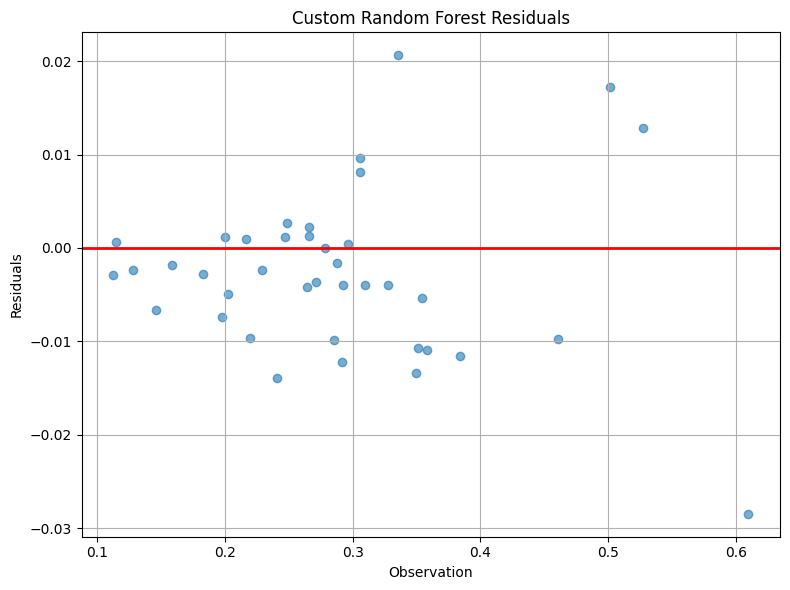

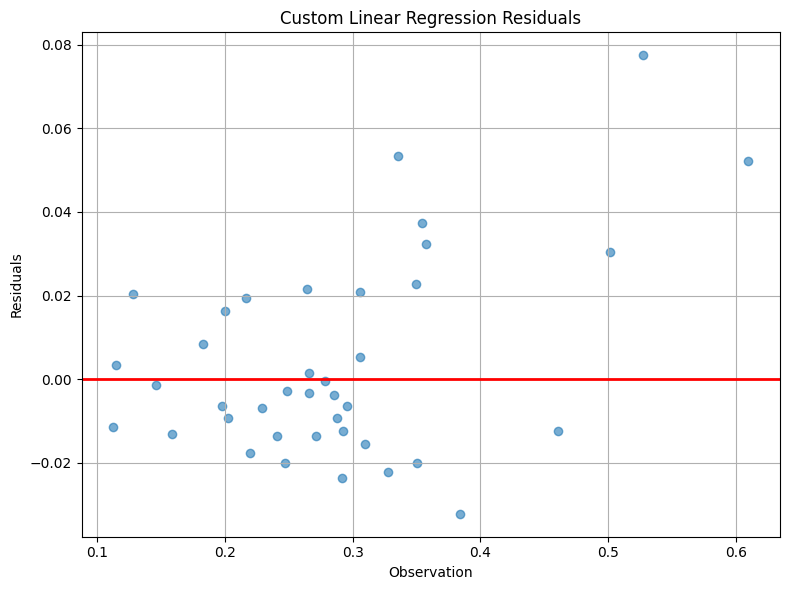

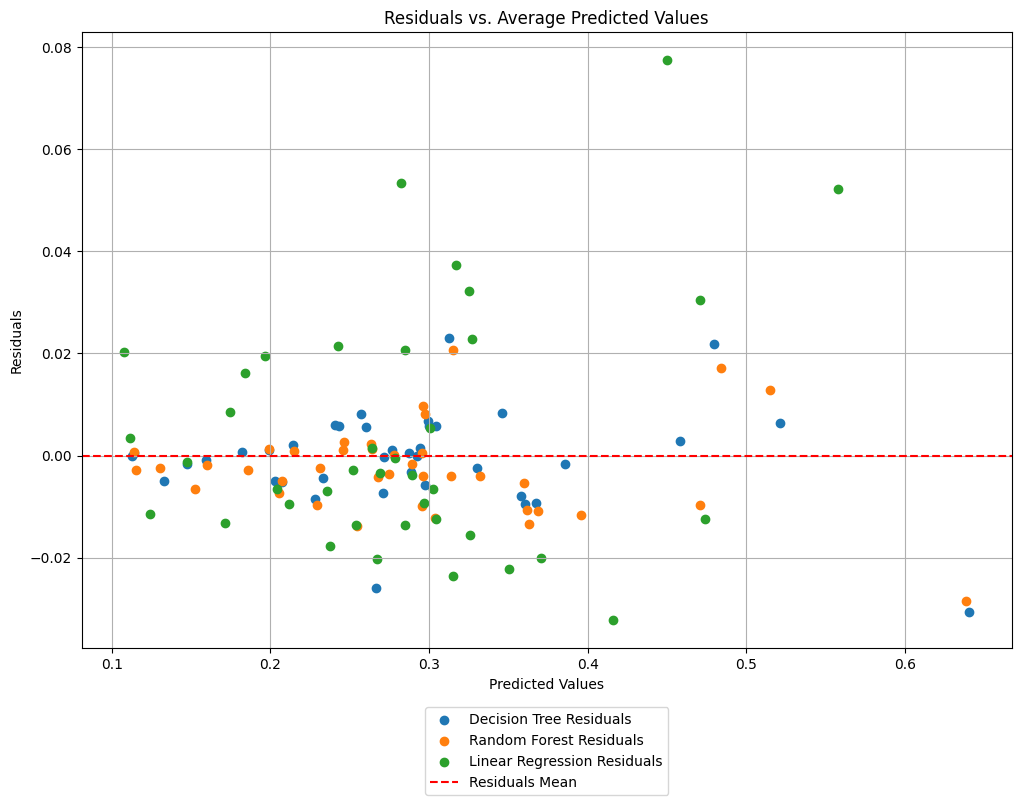

In [ ]:
DT_Residuals = Average_Actual_Values_Numeric - DT_Average_Prediction_Numeric
RF_Residuals = Average_Actual_Values_Numeric - RF_Average_Prediction_Numeric
LR_Residuals = Average_Actual_Values_Numeric - LR_Average_Prediction_Numeric

# Plot for Custom Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(Average_Actual_Values_Numeric, DT_Residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.grid(True)
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Custom Decision Tree Residuals')
plt.tight_layout()
plt.show()

# Plot for Custom Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(Average_Actual_Values_Numeric, RF_Residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.grid(True)
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Custom Random Forest Residuals')
plt.tight_layout()
plt.show()

# Plot for Custom Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(Average_Actual_Values_Numeric, LR_Residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.grid(True)
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Custom Linear Regression Residuals')
plt.tight_layout()
plt.show()

# Residuals vs. Predicted Values for all models
plt.figure(figsize=(12, 8))
plt.scatter(DT_Average_Prediction_Numeric, DT_Residuals, label='Decision Tree Residuals')
plt.scatter(RF_Average_Prediction_Numeric, RF_Residuals, label='Random Forest Residuals')
plt.scatter(LR_Average_Prediction_Numeric, LR_Residuals, label='Linear Regression Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Average Predicted Values')
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.25))
plt.grid(True)
plt.show()

# Average: Execution time in seconds, Mean Absolute Error, Median Absolute Error, Mean Squared Error, Root Mean Squared Error, R Squared, Explained Variance, Maximum Absolute Error

In [ ]:
table_data = {
    '': ['Custom Decision Tree Regressor', 'Custom Random Forest Regressor', 'Custom Linear Regression'],
    'Average Execution Time in seconds': [DT_Average_Time, RF_Average_Time, LR_Average_Time],
    'Average Mean Absolute Error': [DT_Average_MAE, RF_Average_MAE, RF_Average_MAE],
    'Average Median Absolute Error': [DT_Average_MedianAE, RF_Average_MedianAE, LR_Average_MedianAE],
    'Average Mean Squared Error': [DT_Average_MSE, RF_Average_MSE, LR_Average_MSE],
    'Average Root Mean Squared Error': [DT_Average_RMSE, RF_Average_RMSE, LR_Average_RMSE],
    'Average R Squared': [DT_Average_R2, RF_Average_R2, LR_Average_R2],
    'Average Explained Variance': [DT_Average_Explained_Variance, RF_Average_Explained_Variance, LR_Average_Explained_Variance],
    'Average Maximum Absolute Error': [DT_Average_MaxError, RF_Average_MaxError, LR_Average_MaxError]
}

print(tabulate(table_data, headers='keys', tablefmt='fancy_grid'))

╒════════════════════════════════╤═════════════════════════════════════╤═══════════════════════════════╤═════════════════════════════════╤══════════════════════════════╤═══════════════════════════════════╤═════════════════════╤══════════════════════════════╤══════════════════════════════════╕
│                                │   Average Execution Time in seconds │   Average Mean Absolute Error │   Average Median Absolute Error │   Average Mean Squared Error │   Average Root Mean Squared Error │   Average R Squared │   Average Explained Variance │   Average Maximum Absolute Error │
╞════════════════════════════════╪═════════════════════════════════════╪═══════════════════════════════╪═════════════════════════════════╪══════════════════════════════╪═══════════════════════════════════╪═════════════════════╪══════════════════════════════╪══════════════════════════════════╡
│ Custom Decision Tree Regressor │                           0.207439  │                     0.0108296 │              

# Actual vs Predicted Values

╒═════════════════════════╤═══════════════════════════════╤═══════════════════════════════╤═══════════════════════════════╕
│   Average Actual Values │   Average DT Predicted Values │   Average RF Predicted Values │   Average LR Predicted Values │
╞═════════════════════════╪═══════════════════════════════╪═══════════════════════════════╪═══════════════════════════════╡
│                0.461114 │                      0.458218 │                      0.470859 │                      0.473626 │
├─────────────────────────┼───────────────────────────────┼───────────────────────────────┼───────────────────────────────┤
│                0.265422 │                      0.257283 │                      0.264136 │                      0.263853 │
├─────────────────────────┼───────────────────────────────┼───────────────────────────────┼───────────────────────────────┤
│                0.29214  │                      0.29228  │                      0.296155 │                      0.304511 │
├───────

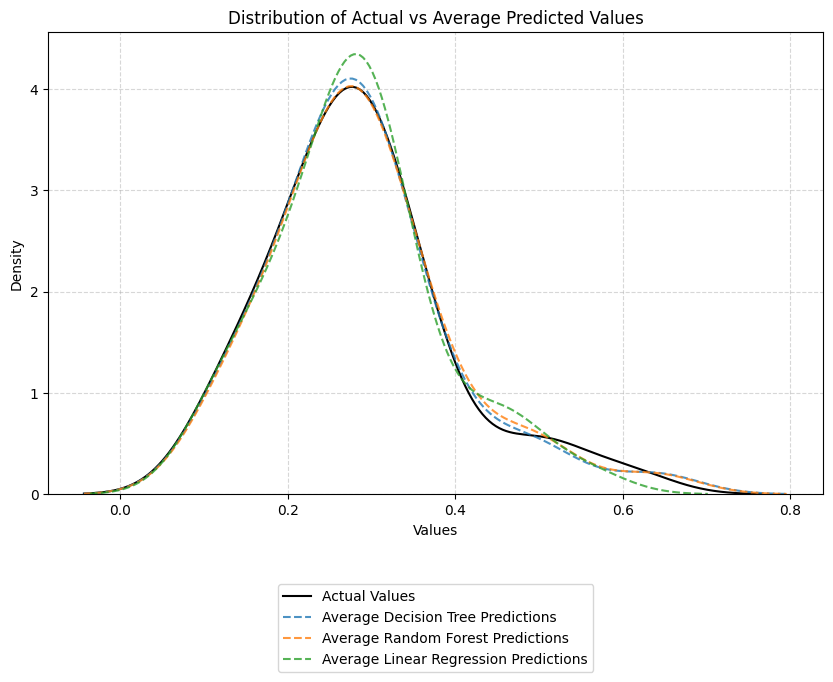

In [ ]:
results_table_data = {
    'Average Actual Values': Average_Actual_Values_Numeric,
    'Average DT Predicted Values': DT_Average_Prediction_Numeric,
    'Average RF Predicted Values': RF_Average_Prediction_Numeric,
    'Average LR Predicted Values': LR_Average_Prediction_Numeric
}

print(tabulate(results_table_data, headers='keys', tablefmt='fancy_grid'))

plt.figure(figsize=(10, 6))
sns.kdeplot(Average_Actual_Values_Numeric, label='Actual Values', color='black', linestyle='-')
sns.kdeplot(DT_Average_Prediction_Numeric, label='Average Decision Tree Predictions', alpha=0.8, linestyle='--')
sns.kdeplot(RF_Average_Prediction_Numeric, label='Average Random Forest Predictions', alpha=0.8, linestyle='--')
sns.kdeplot(LR_Average_Prediction_Numeric, label='Average Linear Regression Predictions', alpha=0.8, linestyle='--')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Average Predicted Values')
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.4))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()